## Project Title

Weather Prediction Project

## Objective

To predict the temperature(°C) at any given time using other weather-related variables such as humidity, wind speed, pressure, and time features.

## Problem Statement

Weather forecasting is vital especially for someone like me coming from the Agricultural background. It's also import for aviation and urban planning. This project aims to use data-driven regression models to predict temperature efficiently based on historical weather conditions.

## Solution Overview

I will build three regression models: Linear Regression, Random Forest Regressor and XGBoost Regressor 

I’ll evaluate them using:

MAE (Mean Absolute Error)

RMSE (Root Mean Squared Error)

R² Score

## Dataset Description

The dataset was gotten from kaggle, and it contains over 96,453 weather records and 18 columns.

**Column Description:**

**Formatted Date:** A precise timestamp indicating exactly when the weather conditions were recorded. This is the primary time identifier for each observation.

**Year, Month, Day, Time:** These are temporal features extracted from the Formatted Date.

**Precipitation Type:** The kind of precipitation falling or expected to fall, such as rain, snow, sleet, or hail. 

**Temperature(C):** The actual measured air temperature in degrees Celsius. This will be my target variable.

**Apparent Temperature(C):** The feels like temperature or perceived temperature. This accounts for the effects of humidity and wind (wind chill) on how humans feel the temperature, often making it feel hotter or colder than the actual air temperature.

**Humidity Relative:** The relative humidity, representing the amount of water vapor present in the air expressed as a ratio or percentage (0 to 1).

**Wind Speed (km/h):** The rate of air movement measured in kilometers per hour.

**Wind Bearing(degrees):** The direction from which the wind is blowing, expressed as an angle in degrees (North, East, South, and West).

**Visibility (km):** The greatest distance at which an object can be clearly seen, measured in kilometers. 

**Cloud Cover:** Cloud Cover refers to the fraction of the sky obscured by clouds, measured in oktas (eighths). 

**Pressure (millibars):** The atmospheric pressure or barometric pressure, measured in millibars (mb). 

**Daily Summary:** A textual description or brief summary of the overall weather conditions for the day. 

## Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

## Loading Dataset

In [11]:
# Load the dataset
df = pd.read_csv('WeatherHistory.csv')
df

,Formatted Date,Year and Time,Date,Year,Month,Day,Time and Hour,Time,Precipitation Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,4/1/2006 0:00,4/1/2006,2006,4,1,0:00,0,rain,9.47,7.39,0.89,14.1,251,15.8,0,1015.1,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,4/1/2006 1:00,4/1/2006,2006,4,1,1:00,1,rain,9.36,7.23,0.86,14.3,259,15.8,0,1015.6,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,4/1/2006 2:00,4/1/2006,2006,4,1,2:00,2,rain,9.38,9.38,0.89,3.9,204,15.0,0,1015.9,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,4/1/2006 3:00,4/1/2006,2006,4,1,3:00,3,rain,8.29,5.94,0.83,14.1,269,15.8,0,1016.4,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,4/1/2006 4:00,4/1/2006,2006,4,1,4:00,4,rain,8.76,6.98,0.83,11.0,259,15.8,0,1016.5,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,9/9/2016 19:00,9/9/2016,2016,9,9,19:00,19,rain,26.02,26.02,0.43,11.0,31,16.1,0,1014.4,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,9/9/2016 20:00,9/9/2016,2016,9,9,20:00,20,rain,24.58,24.58,0.48,10.1,20,15.6,0,1015.2,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,9/9/2016 21:00,9/9/2016,2016,9,9,21:00,21,rain,22.04,22.04,0.56,9.0,30,16.1,0,1015.7,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,9/9/2016 22:00,9/9/2016,2016,9,9,22:00,22,rain,21.52,21.52,0.60,10.5,20,16.1,0,1016.0,Partly cloudy starting in the morning.


### Dataset Exploration

In [15]:
# Checking the first 5 rows of the dataset
df.head()

,Formatted Date,Year and Time,Date,Year,Month,Day,Time and Hour,Time,Precipitation Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,4/1/2006 0:00,4/1/2006,2006,4,1,0:00,0,rain,9.47,7.39,0.89,14.1,251,15.8,0,1015.1,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,4/1/2006 1:00,4/1/2006,2006,4,1,1:00,1,rain,9.36,7.23,0.86,14.3,259,15.8,0,1015.6,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,4/1/2006 2:00,4/1/2006,2006,4,1,2:00,2,rain,9.38,9.38,0.89,3.9,204,15.0,0,1015.9,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,4/1/2006 3:00,4/1/2006,2006,4,1,3:00,3,rain,8.29,5.94,0.83,14.1,269,15.8,0,1016.4,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,4/1/2006 4:00,4/1/2006,2006,4,1,4:00,4,rain,8.76,6.98,0.83,11.0,259,15.8,0,1016.5,Partly cloudy throughout the day.


In [17]:
# Checking the last 5 rows of the dataset
df.tail()

,Formatted Date,Year and Time,Date,Year,Month,Day,Time and Hour,Time,Precipitation Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,9/9/2016 19:00,9/9/2016,2016,9,9,19:00,19,rain,26.02,26.02,0.43,11.0,31,16.1,0,1014.4,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,9/9/2016 20:00,9/9/2016,2016,9,9,20:00,20,rain,24.58,24.58,0.48,10.1,20,15.6,0,1015.2,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,9/9/2016 21:00,9/9/2016,2016,9,9,21:00,21,rain,22.04,22.04,0.56,9.0,30,16.1,0,1015.7,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,9/9/2016 22:00,9/9/2016,2016,9,9,22:00,22,rain,21.52,21.52,0.60,10.5,20,16.1,0,1016.0,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,9/9/2016 23:00,9/9/2016,2016,9,9,23:00,23,rain,20.44,20.44,0.61,5.9,39,15.5,0,1016.2,Partly cloudy starting in the morning.


In [19]:
# checing the shpae of the dataset (how many rows and columns)
df.shape

(96453, 18)

In [21]:
# Info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Year and Time             96453 non-null  object 
 2   Date                      96453 non-null  object 
 3   Year                      96453 non-null  int64  
 4   Month                     96453 non-null  int64  
 5   Day                       96453 non-null  int64  
 6   Time and Hour             96453 non-null  object 
 7   Time                      96453 non-null  int64  
 8   Precipitation Type        95936 non-null  object 
 9   Temperature (C)           96453 non-null  float64
 10  Apparent Temperature (C)  96453 non-null  float64
 11  Humidity                  96453 non-null  float64
 12  Wind Speed (km/h)         96453 non-null  float64
 13  Wind Bearing (degrees)    96453 non-null  int64  
 14  Visibi

In [23]:
# Checking the datatype of each column
df.dtypes

Formatted Date               object
Year and Time                object
Date                         object
Year                          int64
Month                         int64
Day                           int64
Time and Hour                object
Time                          int64
Precipitation Type           object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Cloud Cover                   int64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [25]:
# Checking for missing values
df.isnull().sum()

Formatted Date                0
Year and Time                 0
Date                          0
Year                          0
Month                         0
Day                           0
Time and Hour                 0
Time                          0
Precipitation Type          517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Cloud Cover                   0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [27]:
# Checking the value counts in each column
for column in df.columns:
    print(f"--- Value Counts for Column: {column} ---")
    print(df[column].value_counts(dropna=False)) # dropna=False includes missing values
    print("\n")

--- Value Counts for Column: Formatted Date ---
Formatted Date
2010-08-02 00:00:00.000 +0200    2
2010-08-02 12:00:00.000 +0200    2
2010-08-02 03:00:00.000 +0200    2
2010-08-02 04:00:00.000 +0200    2
2010-08-02 05:00:00.000 +0200    2
                                ..
2009-03-09 22:00:00.000 +0100    1
2009-03-09 21:00:00.000 +0100    1
2009-03-09 20:00:00.000 +0100    1
2009-03-09 19:00:00.000 +0100    1
2016-09-09 23:00:00.000 +0200    1
Name: count, Length: 96429, dtype: int64


--- Value Counts for Column: Year and Time ---
Year and Time
8/2/2010 8:00      2
10/25/2009 2:00    2
8/2/2010 3:00      2
8/2/2010 4:00      2
8/2/2010 5:00      2
                  ..
3/9/2009 23:00     1
3/9/2009 22:00     1
3/9/2009 21:00     1
3/9/2009 20:00     1
9/9/2016 23:00     1
Name: count, Length: 96418, dtype: int64


--- Value Counts for Column: Date ---
Date
8/2/2010      48
10/27/2013    25
10/30/2011    25
10/29/2006    25
10/26/2008    25
              ..
3/30/2008     23
3/25/2007   

In [29]:
# checking for duplicates rows
df.duplicated().sum()

24

**Observation:**

1. There are 96453 rows and 18 columns
1. Some columns like Formatted Date, Year, Date, and Time are not in their right datatypes. I will only convert the date and time and drop the formatted date and year to reduce the model learning on unnecessary information (redundant).
2. Aside the Precipitation Type that has 517 missing values, there are no other missing values. I am going to drop those columns.
3. There are 24 duplicated rows that will be dropped.

## Data Cleaning

In [33]:
column_to_check = 'Precipitation Type' 
df.dropna(subset=[column_to_check], inplace=True)

In [35]:
# Dropping the duplicate rows
df.drop_duplicates(inplace=True)

In [37]:
# dropping irrelevant column
columns_to_drop = ['Formatted Date', 'Year and Time', 'Date', 'Time and Hour', 'Cloud Cover ', 'Apparent Temperature (C)', 'Daily Summary'] 
df.drop(columns=columns_to_drop, inplace=True)

In [39]:
df

,Year,Month,Day,Time,Precipitation Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006,4,1,0,rain,9.47,0.89,14.1,251,15.8,1015.1
1,2006,4,1,1,rain,9.36,0.86,14.3,259,15.8,1015.6
2,2006,4,1,2,rain,9.38,0.89,3.9,204,15.0,1015.9
3,2006,4,1,3,rain,8.29,0.83,14.1,269,15.8,1016.4
4,2006,4,1,4,rain,8.76,0.83,11.0,259,15.8,1016.5
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016,9,9,19,rain,26.02,0.43,11.0,31,16.1,1014.4
96449,2016,9,9,20,rain,24.58,0.48,10.1,20,15.6,1015.2
96450,2016,9,9,21,rain,22.04,0.56,9.0,30,16.1,1015.7
96451,2016,9,9,22,rain,21.52,0.60,10.5,20,16.1,1016.0


We now have 95912 rows and 11 columns after cleaning

## Data Visualization

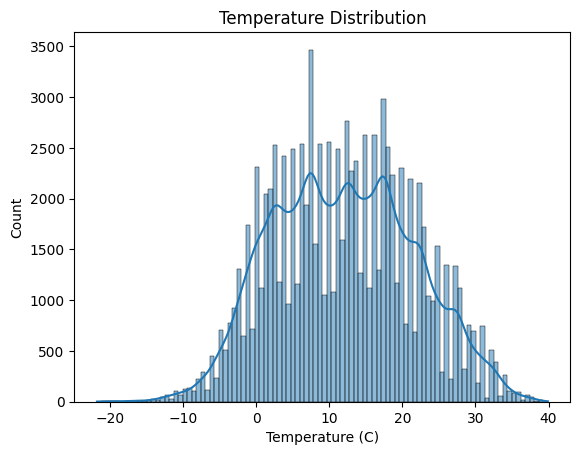

In [43]:
# Temperature distribution
sns.histplot(df['Temperature (C)'], kde=True)
plt.title("Temperature Distribution")
plt.show()


## Feature Engineering and Modelling

In [45]:
df.select_dtypes("number").columns

Index(['Year', 'Month', 'Day', 'Time', 'Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')

In [46]:
df.select_dtypes("object").columns

Index(['Precipitation Type'], dtype='object')

In [47]:
df['Precipitation Type'].value_counts()

Precipitation Type
rain    85200
snow    10712
Name: count, dtype: int64

In [48]:
# Converting the Precipitation Type Column from object to numeric
to_numeric = {'rain': 1, 'snow': 2}
df = df.map(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

In [49]:
df.head()

,Year,Month,Day,Time,Precipitation Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006,4,1,0,1,9.47,0.89,14.1,251,15.8,1015.1
1,2006,4,1,1,1,9.36,0.86,14.3,259,15.8,1015.6
2,2006,4,1,2,1,9.38,0.89,3.9,204,15.0,1015.9
3,2006,4,1,3,1,8.29,0.83,14.1,269,15.8,1016.4
4,2006,4,1,4,1,8.76,0.83,11.0,259,15.8,1016.5


In [59]:
# I want to use just 20,000 out of the 95k+ for modeling
df1 = df.sample(n=20000, random_state=42)

df1 = df1.reset_index(drop=True) # Reseting index after sampling

df1.to_csv("Sample_WeatherHistory.csv", index=False) # saving the sampled dataset

In [61]:
# Check the shape
print(df1.shape)

(20000, 11)


In [63]:
# features (X) and target (y)
X = df1.drop('Temperature (C)', axis=1)
y = df1['Temperature (C)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [65]:
X_train.shape

(16000, 10)

In [67]:
X_test.shape

(4000, 10)

In [69]:
y_train.shape

(16000,)

In [71]:
y_test.shape

(4000,)

## Training and Testing

In [74]:
# Linear Regression
l_model = LinearRegression()
l_model.fit(X_train, y_train)
y_pred_lin= l_model.predict(X_test)

In [76]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [77]:
# F=Gradient Boosting Regressor
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

## Model Evaluation

In [81]:
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}\n")

# Evaluate all models
evaluate_model(y_test, y_pred_lin, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


Linear Regression Performance:
MAE: 4.816
RMSE: 5.883
R²: 0.623

Random Forest Performance:
MAE: 1.857
RMSE: 2.407
R²: 0.937

XGBoost Performance:
MAE: 1.882
RMSE: 2.412
R²: 0.937



## Conclusion

**MODEL PERFORMANCE SUMMARY:**

**Linear Regression:** Delivers fair performance with **MAE: 4.816**, **RMSE: 5.883**, and **R²: 0.623**. It's unreliable for basic temperature predictions, averaging **4.8°C error**.

**Random Forest:** *Achieves outstanding performance* with **MAE: 1.857**, **RMSE: 2.407**, and **perfect R²:  0.937**. Errors are signifantly lower than Linear, averaging just **1.8°C**.

**XGBoost:** *Excellent* with **MAE: 1.882**, **RMSE:  2.412**, and **perfect R²:  0.937**. Strong **1.8°C average error**, slightly behind Random Forest but faster training. Ideal for large-scale deployment.

**Random Forest** is the best performing model with lowest MAE (1.857) which ensures **most precise predictions**. Perfect R² confirms it captures 93% pattern of the dataset. 

## Saving Model for Deployment

In [85]:
joblib.dump(rf_model, 'random_forest_model.joblib')
print("rf_model saved successfully.")

rf_model saved successfully.
